<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

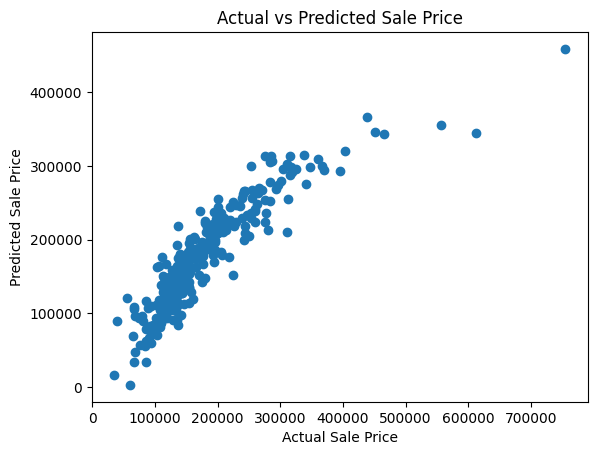

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Introduction
# Loading dataset
train = pd.read_csv('train.csv')

# Brief overview of the data
print(train.info())
print(train.describe())

# 2. Understanding Regression (Linear Regression Explanation)
# Linear regression finds the best-fit line by minimizing the error between actual and predicted values.
# The equation of a line: y = b0 + b1*x, where b0 is the intercept and b1 is the slope.

# 3. Experiment 1: Data Understanding and Pre-processing
# Check for missing values
missing_values = train.isnull().sum().sort_values(ascending=False)
print("Missing values in each column:")
print(missing_values[missing_values > 0])

# Handle missing values (for simplicity, filling numerical NaNs with median and categorical with mode)
for column in train.columns:
    if train[column].dtype == 'object':
        train[column] = train[column].fillna(train[column].mode()[0])
    else:
        train[column] = train[column].fillna(train[column].median())

# Convert categorical variables to dummy/indicator variables
train = pd.get_dummies(train)

# 4. Experiment 1: Modeling
# Select features (for simplicity, we are using a subset of available features)
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
X = train[features]
y = train['SalePrice']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE) for Linear Regression: {rmse}")

# Plotting actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.show()
